**Import Libraries**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

**Load Dataset**

In [29]:
file_path = 'Boston-house-price-data.csv'
boston_data = pd.read_csv(file_path)

In [30]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Missing Values**

In [31]:
missing=boston_data.isnull().sum()
missing

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [32]:
boston_data = boston_data.drop(columns=['CHAS'], errors='ignore')

boston_data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**One Hot Encoding**

In [33]:
# Import necessary libraries for encoding
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = boston_data.select_dtypes(include=['object', 'category']).columns

# Apply One Hot Encoding if there are any categorical columns
if len(categorical_columns) > 0:
    encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap
    encoded_data = pd.DataFrame(encoder.fit_transform(boston_data[categorical_columns]))
    encoded_data.columns = encoder.get_feature_names_out(categorical_columns)

    # Drop original categorical columns and concatenate the encoded columns
    boston_data = boston_data.drop(columns=categorical_columns).reset_index(drop=True)
    boston_data = pd.concat([boston_data, encoded_data], axis=1)

    print("Categorical columns have been encoded using One Hot Encoding.")
else:
    print("No categorical columns found to encode.")

# Display the first few rows of the updated dataset
print(boston_data.head())

No categorical columns found to encode.
      CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


**Split Data to Training and Testing**

In [36]:
# Calculate the median of the target column (MEDV)
median_price = y['MEDV'].median() # Access the 'MEDV' column of y

# Categorize the target variable: 1 for prices above or equal to the median, 0 for below the median
y_class = (y['MEDV'] >= median_price).astype(int) # Access the 'MEDV' column of y

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)


**Logistic Regression**

In [37]:
# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_class)

# Print evaluation metrics for Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test_class, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_logistic))

Logistic Regression Performance:
Accuracy: 0.993421052631579
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.98      0.99        62

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152

Confusion Matrix:
 [[90  0]
 [ 1 61]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree**

In [41]:
# Decision Tree Classifier model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_tree = tree_model.predict(X_test_class)

# Print evaluation metrics for Decision Tree Classifier
print("\nDecision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_tree))
print("Classification Report:\n", classification_report(y_test_class, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_tree))


Decision Tree Classifier Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        62

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

Confusion Matrix:
 [[90  0]
 [ 0 62]]


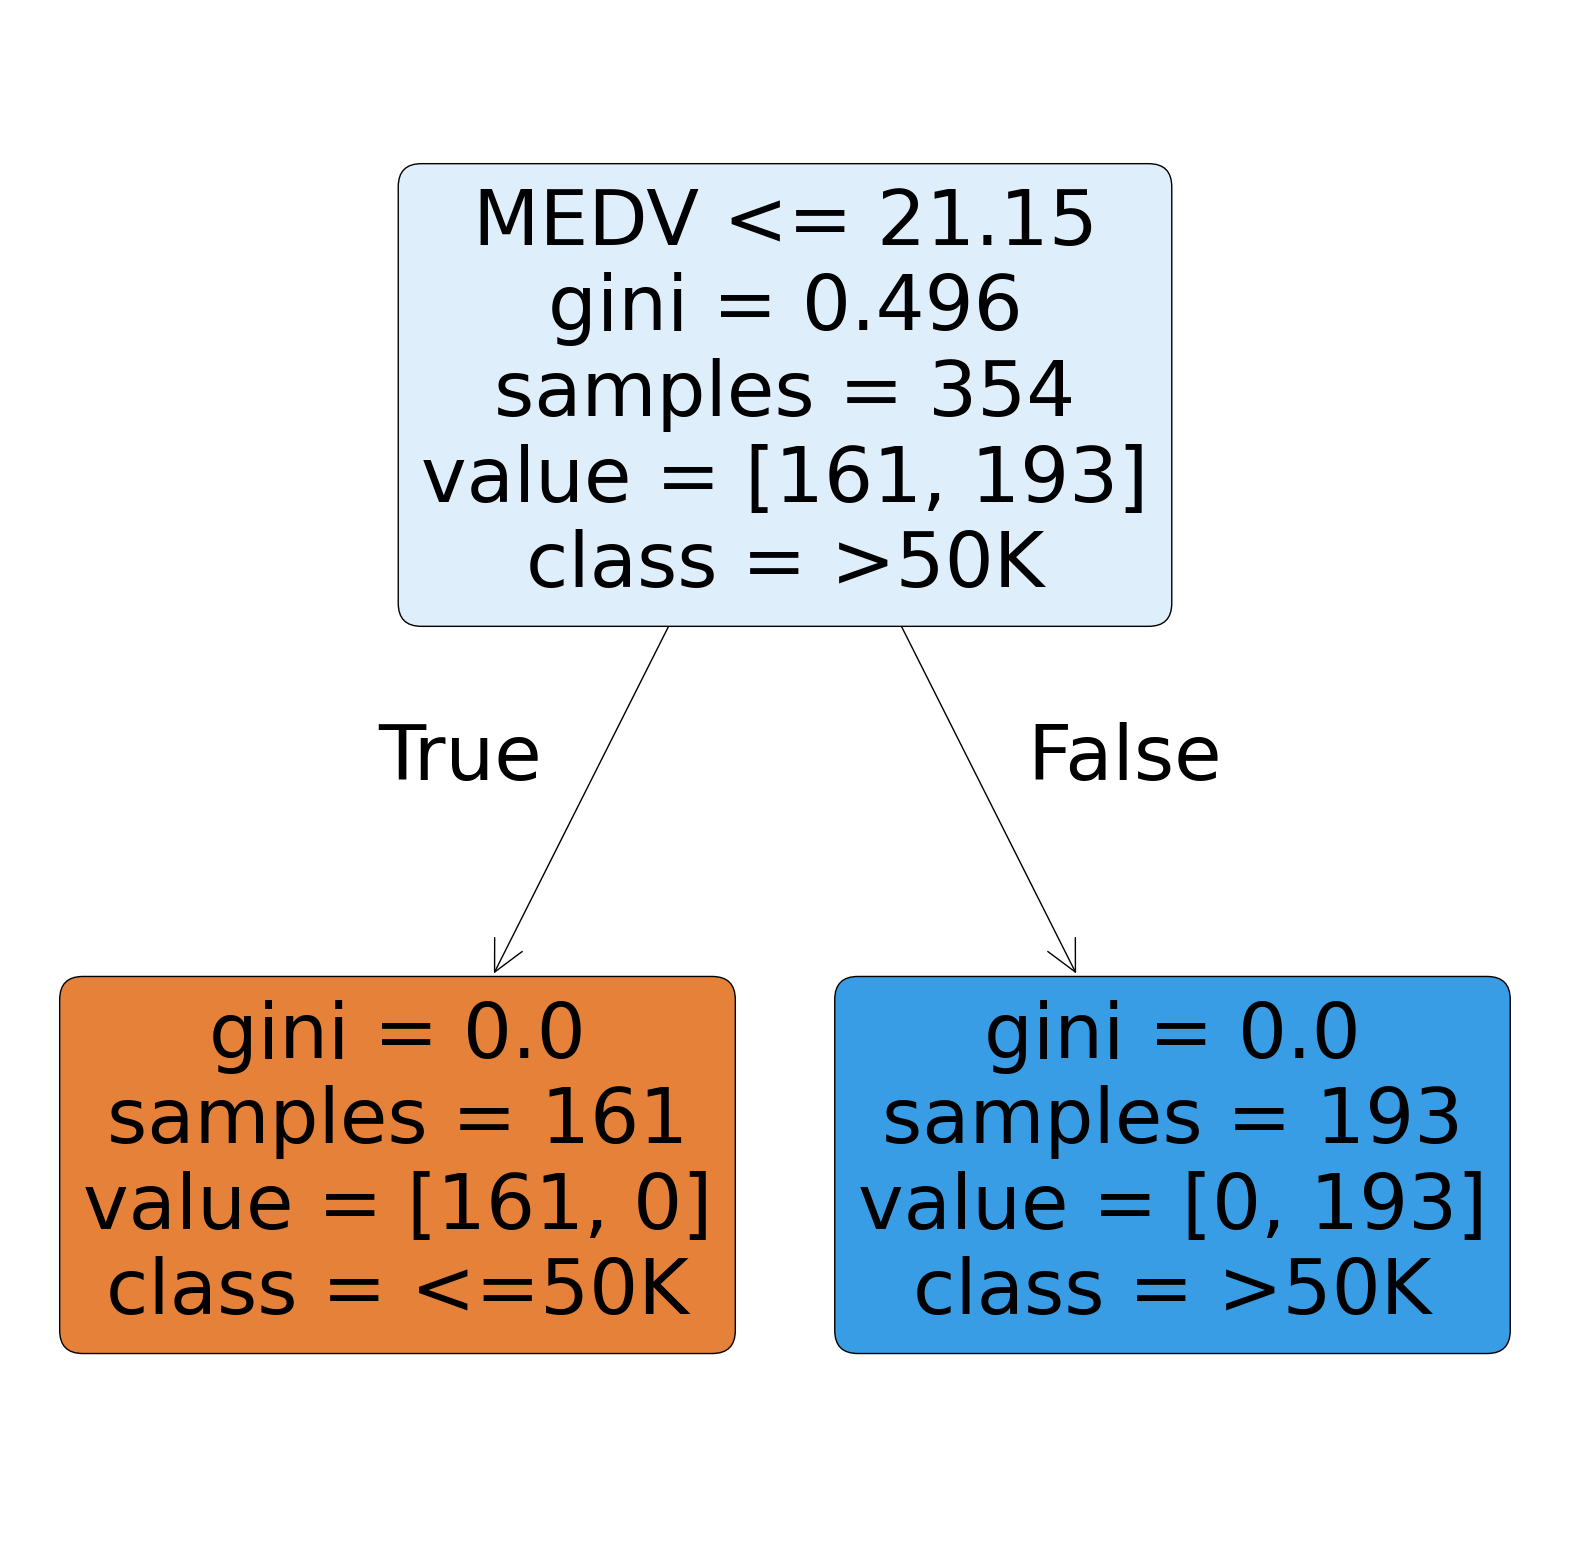

In [42]:
#plot the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(tree_model,
               feature_names=X_train_class.columns,
               class_names=['<=50K', '>50K'],
               filled=True,
               rounded=True)
plt.show()

In [43]:
# Create the Random Forest Classifier with Gini index as the criterion
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
random_forest_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test_class)

# Print evaluation metrics for Random Forest Classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_class, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_rf))


Random Forest Classifier Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        62

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

Confusion Matrix:
 [[90  0]
 [ 0 62]]


In [45]:
# Get feature importances from the model
feature_importances = random_forest_model.feature_importances_
features = X_train_class.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Sort feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
12,MEDV,0.470864
11,LSTAT,0.139291
9,PTRATIO,0.086386
4,RM,0.078089
8,TAX,0.046584
3,NOX,0.043542
5,AGE,0.033868
0,CRIM,0.028717
6,DIS,0.023202
2,INDUS,0.021335


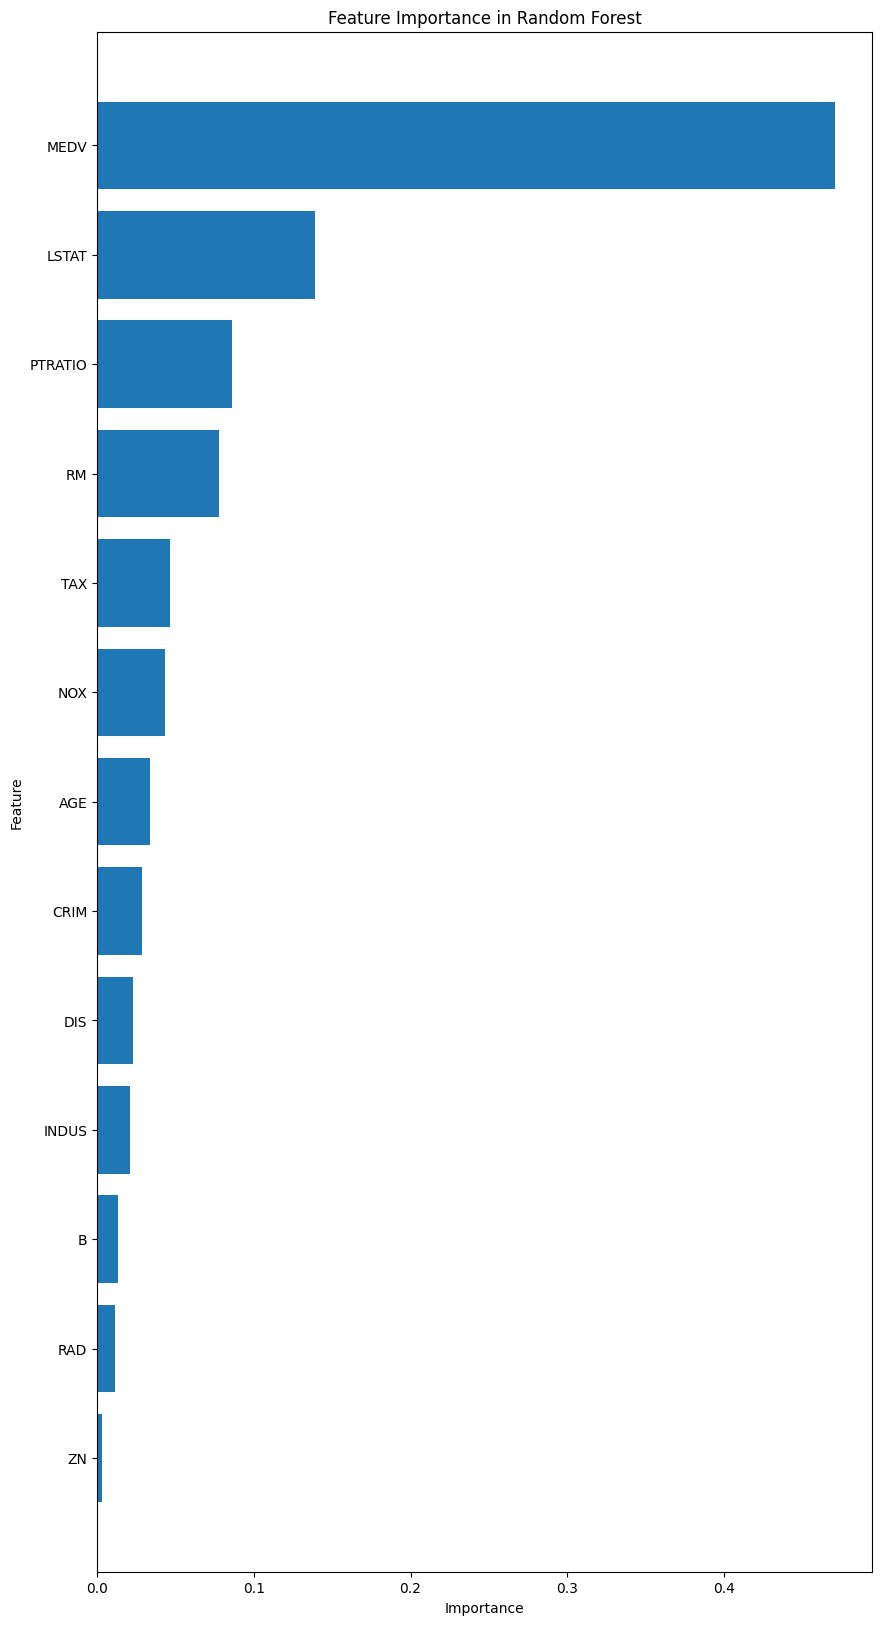

In [46]:
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [47]:
# Create the Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_gb = gradient_boosting_model.predict(X_test_class)

# Print evaluation metrics for Gradient Boosting Classifier
print("Gradient Boosting Classifier Performance:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_gb))
print("Classification Report:\n", classification_report(y_test_class, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_gb))


Gradient Boosting Classifier Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        62

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

Confusion Matrix:
 [[90  0]
 [ 0 62]]


In [48]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(boston_data)

# Identify categorical columns
categorical_columns = boston_data.select_dtypes(include=['object', 'category']).columns

# Apply One Hot Encoding if there are any categorical columns
if len(categorical_columns) > 0:
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_data = pd.DataFrame(encoder.fit_transform(boston_data[categorical_columns]))
    encoded_data.columns = encoder.get_feature_names_out(categorical_columns)

    # Drop original categorical columns and concatenate the encoded columns
    boston_data = boston_data.drop(columns=categorical_columns).reset_index(drop=True)
    boston_data = pd.concat([boston_data, encoded_data], axis=1)

    print("Categorical columns have been encoded using One Hot Encoding.")
else:
    print("No categorical columns found to encode.")

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(boston_data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])

pca_df.head()


No categorical columns found to encode.


,Principal Component 1,Principal Component 2
0,-2.088546,0.607033
1,-1.374762,-0.190585
2,-2.377643,1.111316
3,-2.839125,0.367233
4,-2.774178,0.622229


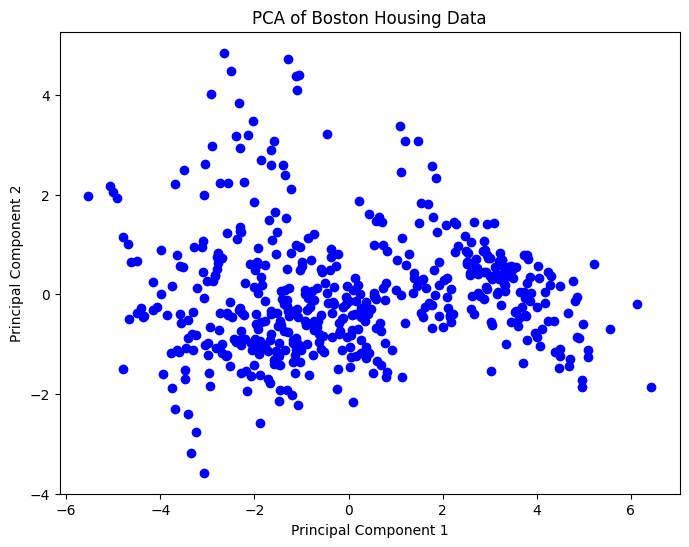

In [49]:
# Visualize the data after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o')
plt.title('PCA of Boston Housing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

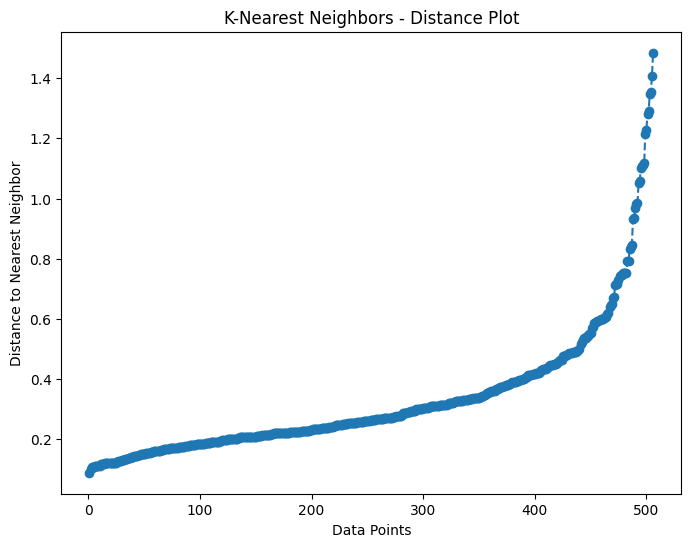

In [50]:
from sklearn.neighbors import NearestNeighbors
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_class, test_size=0.3, random_state=42)

# Apply KNN for clustering
k=5
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X_pca)

# Find the nearest neighbors for visualization
distances, indices = knn_model.kneighbors(X_pca)

# Plot distances to show KNN clustering impact
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(distances)+1), sorted(distances[:, -1]), marker='o', linestyle='--')
plt.title('K-Nearest Neighbors - Distance Plot')
plt.xlabel('Data Points')
plt.ylabel('Distance to Nearest Neighbor')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure the KNN model is trained and predictions are made
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_pca, y_train_pca)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test_pca)

# Evaluate the KNN model's performance
print("K-Nearest Neighbors (KNN) Classifier Performance:")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_knn))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_knn))

K-Nearest Neighbors (KNN) Classifier Performance:
Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        90
           1       0.86      0.82      0.84        62

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.87      0.88      0.87       152

Confusion Matrix:
 [[82  8]
 [11 51]]


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert 'MEDV' to categorical (binary classification for this example)
median_medv = boston_data['MEDV'].median()
boston_data['MEDV_class'] = (boston_data['MEDV'] > median_medv).astype(int)

# Separate features (X) and target (y)
X = boston_data.drop(columns=['MEDV', 'MEDV_class'])
y = boston_data['MEDV_class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Test different values of k and calculate the average accuracy
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Average accuracy for the best k ({best_k}): {max(accuracy_scores):.4f}")

Best k value: 18
Average accuracy for the best k (18): 0.8300


In [53]:
# Train the final KNN model using the best k value obtained from hyperparameter tuning
best_k = 18
knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model using the PCA-transformed training data
knn_model.fit(X_train_pca, y_train_pca)

# Make predictions on the PCA-transformed test data
y_pred = knn_model.predict(X_test_pca)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_pca, y_pred)
print(f"Accuracy with k={best_k}: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test_pca, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred))


Accuracy with k=18: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91        90
           1       0.87      0.85      0.86        62

    accuracy                           0.89       152
   macro avg       0.88      0.88      0.88       152
weighted avg       0.89      0.89      0.89       152

Confusion Matrix:
 [[82  8]
 [ 9 53]]
